#<center> Théorème centrale limite et loi t de Student </center>

In [2]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline


### TCL intuitivement

Considérons `X[0],X[1],...` une suite iid de va. Définissons `S[n]=X[0]+...X[n-1]`
On peut imaginer que les `X[i]` sont des erreurs élémentaires, et donc `S[n]` une erreur globale.
Le théorème centrale limite (TCL) nous indique que, lorsque `n` grandis, la loi de `S[n]` "se rapproche" d'un gaussienne.



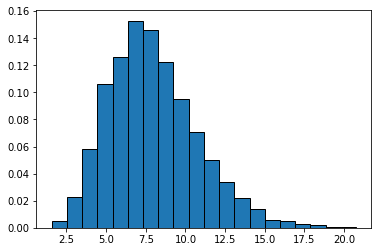

In [5]:
""" nombre de v.a que l'on va sommer """
n = 8
""" nombre de fois où l'on va effectuer cette somme. 
Comme il s'agit d'illustrer une loi, on est obligé de faire plusieurs essais (="essaies" in english)"""
nbEssaies=3000

collect=[]
for i in range(nbEssaies):
    X=np.random.exponential(size=n)
    S=np.sum(X)
    collect.append(S)

plt.hist(collect,20,normed=True,edgecolor="k");


### TCL mathématiquement

Nous avons dit : << La loi de `S[n]` "se rapproche" d'une gaussienne>> ... pas très précis cela. C'est vrai que plus n est grand, et plus l'histogramme a une forme de cloche (testez cela), mais ces cloches ont tendances à se dilater et à se translater de plus en plus. C'est très naturelle : l'espèrance et la variance de S[n] augmente ! Pour "converger" vers une cloche fixée il faut centrer-réduire :

***Théorème:***   Quand `n` tend vers l'infini, la version centrée-réduite de `S[n]` converge
en loi vers une gaussienne (gaussienne centrée-réduite of course).


**Exo:** 

* Notons `mu` et `sigma2` l'espérance et la variance de `X[0]`. Calculez l'espérance et la variance de `S[n]`. Ecrirez l'expression de la version centrée-réduite de `S[n]`. Modifiez le programme précédent pour dresser l'histogramme de la version centrée réduite de `S[n]`.

* Superposer l'histogramme ainsi obtenu avec la densité de la gaussienne. 


**Aide:** Attention, quand on centre-réduit on doit diviser par 
- [ ] l'écart-type
- [ ] la variance
- [ ] l'espérance 

(cochez la bonne réponses).  Vous devriez voir apparaitre `sqrt(n)` dans vos équations. 

### Théorème central limite (TCL) et loi forte des grands nombres (LFGN)

Il y a plusieurs façons de présenter le TCL. Nous venons de voir ma façon préférée (très mnémotechnique) :

<center>    centrer-réduire une somme de va iid ---> gaussienne </center>


Mais parfois on présente le TCL en indiquant qu'il permet de préciser la vitesse de convergence de la LFGN.

**Exo:** Trouvez une formule du type :
	S[n]/ n  - mu   ~  f(n) * cst
où
* `f(n)`    est une certaine expression qui tend vers zéro,
* `cst`     ne varie pas selon n (mais n'est pas vraiment constante)
* `~`       n'est pas une équivalence au sens usuel



### Une hypothèse manquante ? 

Le TCL est un théorème universelle puisqu'il est vrai pour toutes les lois.  Toute ? 

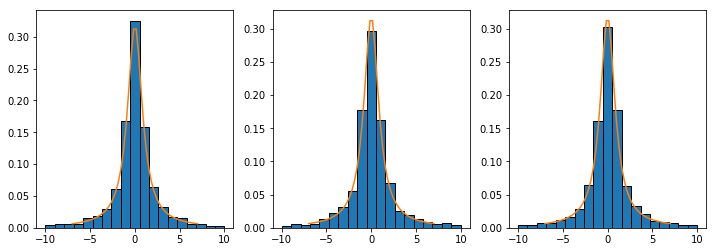

In [30]:
""" une fonction effectuant un histogramme tronqué """
def hist_trunc(ech,gauche,droite,nb_batons):  
    bins=np.linspace(gauche,droite,nb_batons)
    interval_width=(droite-gauche)/nb_batons
    weigh=np.ones_like(ech)/len(ech)/interval_width
    plt.hist(ech,bins=bins,weights=weigh,edgecolor="k")


""" il faut toujours tester ses fonctions"""
def test():
    X=np.random.normal(size=1000)
    hist_trunc(X,-1,1,10)

    

""" dressons l'histogramme de la moyenne de n v.a de Cauchy """
def cauchy_sum(n):
    nbEssaies=3000    
    collect=[]

    for i in range(nbEssaies):
        X=stats.cauchy.rvs(size=n)
        """ ici on divise par n, au lieu de sqrt(n) comme dans le TCL """
        S=np.sum(X)/n 
        collect.append(S)
        
    hist_trunc(collect,-10,10,20)


    x=np.linspace(-7,7,50)
    plt.plot(x,stats.cauchy.pdf(x))






plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
cauchy_sum(5)
plt.subplot(1,3,2)
cauchy_sum(20)
plt.subplot(1,3,3)
cauchy_sum(30)
    
    

### Le même programme sans boucle

Quand on a un peu l'habitude, on peut faire le même programme que le précédent sans boucle for ;
c'est plus compacte et plus rapide (les boucles implicites se font dans un langage compilé).  

(3000,)


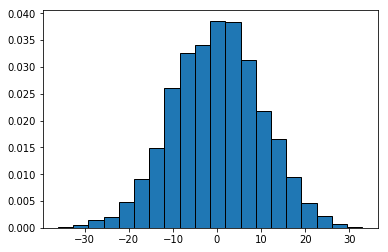

In [6]:
nbEssaies = 3000
n=100
"""on tire une matrice ech[i,j] de va gaussiennes"""
ech=np.random.normal(size=[nbEssaies,n])
""" axis=1 signifie que l'on somme sur l'indice 1 (j): collect[i]=sum_j ech[i,j]  """
collect=np.sum(ech, axis=1)
"""vérifions qu'on a un vecteur de la shape voulue."""
print(collect.shape)
plt.hist(collect,20,normed=True,edgecolor="k");


***exo :*** Centrez réduire, rajouter la densité de la gaussienne avec ce programme dans boucle.  

# intervalle de confiance

Supposons que l'on dispose d'un échantillon issue d'une v.a dont on connait l'écart-type mais dont on ne connait pas
l'espérance. 

(C'est une situation artificielle : dans les cas pratique, on ne connait ni l'un ni l'autre)

In [7]:
""" les températures du mois d'aout enregistrées à Strasbourg """
temperatures=[ 28.7,32.1,30.2,35.5,29.4,29.4,34.5,32.9,29.4,28.5,33.7,30.5,35., 30.3,29.6,29.8,31.7,28.2,28.3,29.9,28.5,28.9,31.8,36.2,35.1,35.5,28.3,29.7,38.7,28.8,31.5]
""" un devin sérieux nous indique que l'écart-type théorique associé est sigma=3. 
 Vérifions que l'écart-type estimé est proche de sa valeur théorique:
 """
print(np.std(temperatures))

2.82401622479


In [8]:
""" Pour estimer l'espérance de la température journalière, il suffit de faire une moyenne :"""

print("temp moyenne: mean(X)=",np.mean(temperatures))

temp moyenne: mean(X)= 31.3096774194


**Exo:** Construisez maintenant un intervalle de confiance de la forme 
$$	
I=[\hat \mu -\epsilon, \hat \mu +\epsilon]
$$ 
de telle manière à ce que :
$$
\mathbf P[\mu \in I]=0.95
$$


Aide mathémathique (essayer sans la lire) :
 
>  $\hat \mu$  est (très proche) d'une gaussienne de moyenne $\mu$ et d'écartype [...] Donc $(\hat \mu-\mu)/cst est une gaussienne centrée réduite.
 La fonction quantile de la gaussienne nous permet de trouver $a$ telle que
$$
\mathbf P[ -a<(\hat \mu-\mu) / cst<a ]=0.95
$$
 Une petite manipulation de cette expression nous donne l'intervalle de confiance.


Aide informatique :
> Pour obtenir la fonction quantile de la gaussienne: `stat.norm.ppf(x)`

**Exo suite:** Les températeur donnée précédemment on été générées avec la fonction `generate_temperatures()`ci-dessous. Lancez de nombreuse fois cette fonction, et vérifiez que l'espérance théorique (que je vous laisse calculer) tombe dans 95% des cas dans votre intervalle de confiance (attention, il faut le recalculer à chaque tirage !). 

Refaite la même manip avec un intervalle de confiance à 90% et 99%. 

In [9]:
def generate_temperatures(n=31):
    """"""
    """la loi du chi2 à df degré de liberté (degree of freedom) c'est simplement la somme de df-gaussiennes"""
    return np.random.chisquare(df=3,size=n)+28

# Loi t de Student

Deux lois importantes pour les stats:

 * chi2(n)    = loi du chi2 à n-degré de liberté
 * t(n)       = loi t de Student à n-degré de liberté

Elles peuvent être décrites de la manière suivante :
Si X1,...,Xn iid suivent des N(0,1)      alors   X1^2+...+Xn^2 suit une Chi2(n)
Si Z,U sont indépendant avec Z ~ N(0,1) et U ~ Chi2(n)   alors   Z / (sqrt(U/n)) suit une t(n)




** Exo:** sur un même graphique, dessinez les densité des lois de Student pour df=1,2,4,5,10. Vérifiez que plus df esst grand et plus la loi de student ressemble à la gaussienne. 

Aide : utiliser scipy : `stats.t.pdf()`

### Pourquoi la loi de Student est importante en statistique :  


On considère un échantillon :  `X = X[0],...,X[n-1]`  représentant des observations iid d'une quantité.

On note :
   	mu=E(X[0])
   	sigma2= V(X[0])
se sont des caractéristiques de la vraie quantité. Si on n'y a pas accès, on les estime par
   	mean(X) = 1/n     sum_i X[i]
   	std2(X) = 1/(n-1) sum_i (X[i]-mean(X))**2
En numpy :
   	mean(X) =np.mean(X)
   	std2(X) =np.std(X,ddof=1)**2
`ddof=1` c'est pour préciser que l'on divise par `n-1`, attention par défaut `ddof=0`. On divise par `n-1` pour avoir un
estimateur sans biais càd vérifiant `E(std2(X))=sigma2`   (faites le calcul, c'est un bon exo).


Maintenant nous aimerions répondre à la question suivante :
<center>        <<de combien  `mean(X)` et `mu` sont éloignés ? >> </center>


Le TCL (théorème central limite) nous indique que :
```
       mean(X)-mu
   ----------------    ~  N(0,1)
     sigma/sqrt(n)
```


Mais quand on travaille avec de vraies observations, on n'a pas accès à sigma, on le remplace donc par son estimation, et il se trouve que:
```
           mean(X)-mu
        ----------------    ~   t(df=n-1)
          std(X)/sqrt(n)
```
NB: en fait le symbole `~` est une égalité en loi quand les `X[i]` sont des gaussiennes, sinon c'est une approximation. 



Dans le programme suivant nous suivons cette recette :
Prendre `n` v.a gaussiennes indépendantes, en faire la moyenne, centrer-réduire empiriquement le tout.
Et on obtient une va de student à n-1 degrés de liberté.

(J'ai fais volontairement une petite erreur qui fait que l'histogramme ne colle pas exactement à la densité,
corrigez-la. Si vous le la trouvez pas, relisez le texte ci-dessus)





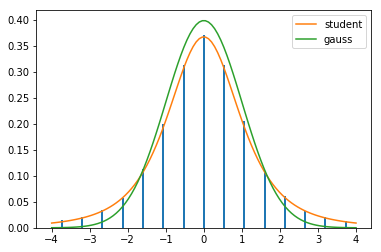

In [11]:
nbEssaies=20000
nbGauss = 4
df=nbGauss-1

sample=np.zeros(nbEssaies)

for i in range(nbEssaies):
    gauss=np.random.normal(size=nbGauss)
    sample[i]=np.mean(gauss)/(np.std(gauss,ddof=1)/np.sqrt(nbGauss))

"""on limite l'intervalle pour avoir un plus beau graphique"""
a, b = [-4, 4]
plt.hist(sample[(a < sample) & (sample < b)], 15, normed=True, rwidth=0.1)

x = np.linspace(a, b, 100)
plt.plot(x, stats.t.pdf(x, df), label="student")
plt.plot(x, stats.norm.pdf(x), label="gauss")
plt.legend();